#Preprocessing steps :

1) Create dummy or indicator features for categorical variables.
2) Standardize the magnitude of numeric features using a scaler
3) Split your data into testing and training datasets

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here. A convenience interface for specifying models 
import scipy

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [16]:
data = pd.read_csv('../data/processed/finaldata_09082023.csv',parse_dates=['registration_init_time'])

In [17]:
data.head()

,Unnamed: 0,msno,is_churn,city,bd,registered_via,registration_init_time,registered_year,change_in_payment_method,total_transaction,...,diff_last2month_sum_num985,diff_last2month_mean_num985,diff_last2month_sum_num100,diff_last2month_mean_num100,diff_last2month_sum_num_unq,diff_last2month_mean_num_unq,age_group,diff_last2month_total_secs_sum,Days_Diff_trans_expire_date,last_transaction_Exp_year
0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,3.0,2013-12-23,2013.0,2,6,...,9.0,-0.090909,274.0,-15.090909,302.0,-14.363636,"(20, 30]",68125.943,30,2017
1,1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,3.0,2013-12-23,2013.0,3,6,...,-3.0,-0.333333,-43.0,-3.333333,-38.0,-2.555556,"(10, 20]",-11487.714,31,2017
2,2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,3.0,2013-12-27,2013.0,3,20,...,4.0,0.200000,-34.0,-1.700000,25.0,1.250000,"(10, 20]",-336.420,93,2017
3,3,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,7.0,2014-01-25,2014.0,1,32,...,-2.0,-0.233333,794.0,50.133333,335.0,18.783333,"(30, 40]",194386.863,186,2017
4,4,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,22.0,27.0,3.0,2014-01-26,2014.0,1,21,...,-9.0,0.000000,-221.0,-10.596154,-292.0,-14.153846,"(20, 30]",-59574.465,-2,2017


In [18]:
del data['Unnamed: 0']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800505 entries, 0 to 800504
Data columns (total 86 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   msno                               800505 non-null  object        
 1   is_churn                           800505 non-null  int64         
 2   city                               800505 non-null  float64       
 3   bd                                 800505 non-null  float64       
 4   registered_via                     800505 non-null  float64       
 5   registration_init_time             800505 non-null  datetime64[ns]
 6   registered_year                    800505 non-null  float64       
 7   change_in_payment_method           800505 non-null  int64         
 8   total_transaction                  800505 non-null  int64         
 9   max_payment_method                 800505 non-null  int64         
 10  avg_plan_days       

category columns
 'city', 'age_group',registered_via,registered_year','change_in_payment_method'

<Axes: xlabel='age_group', ylabel='count'>

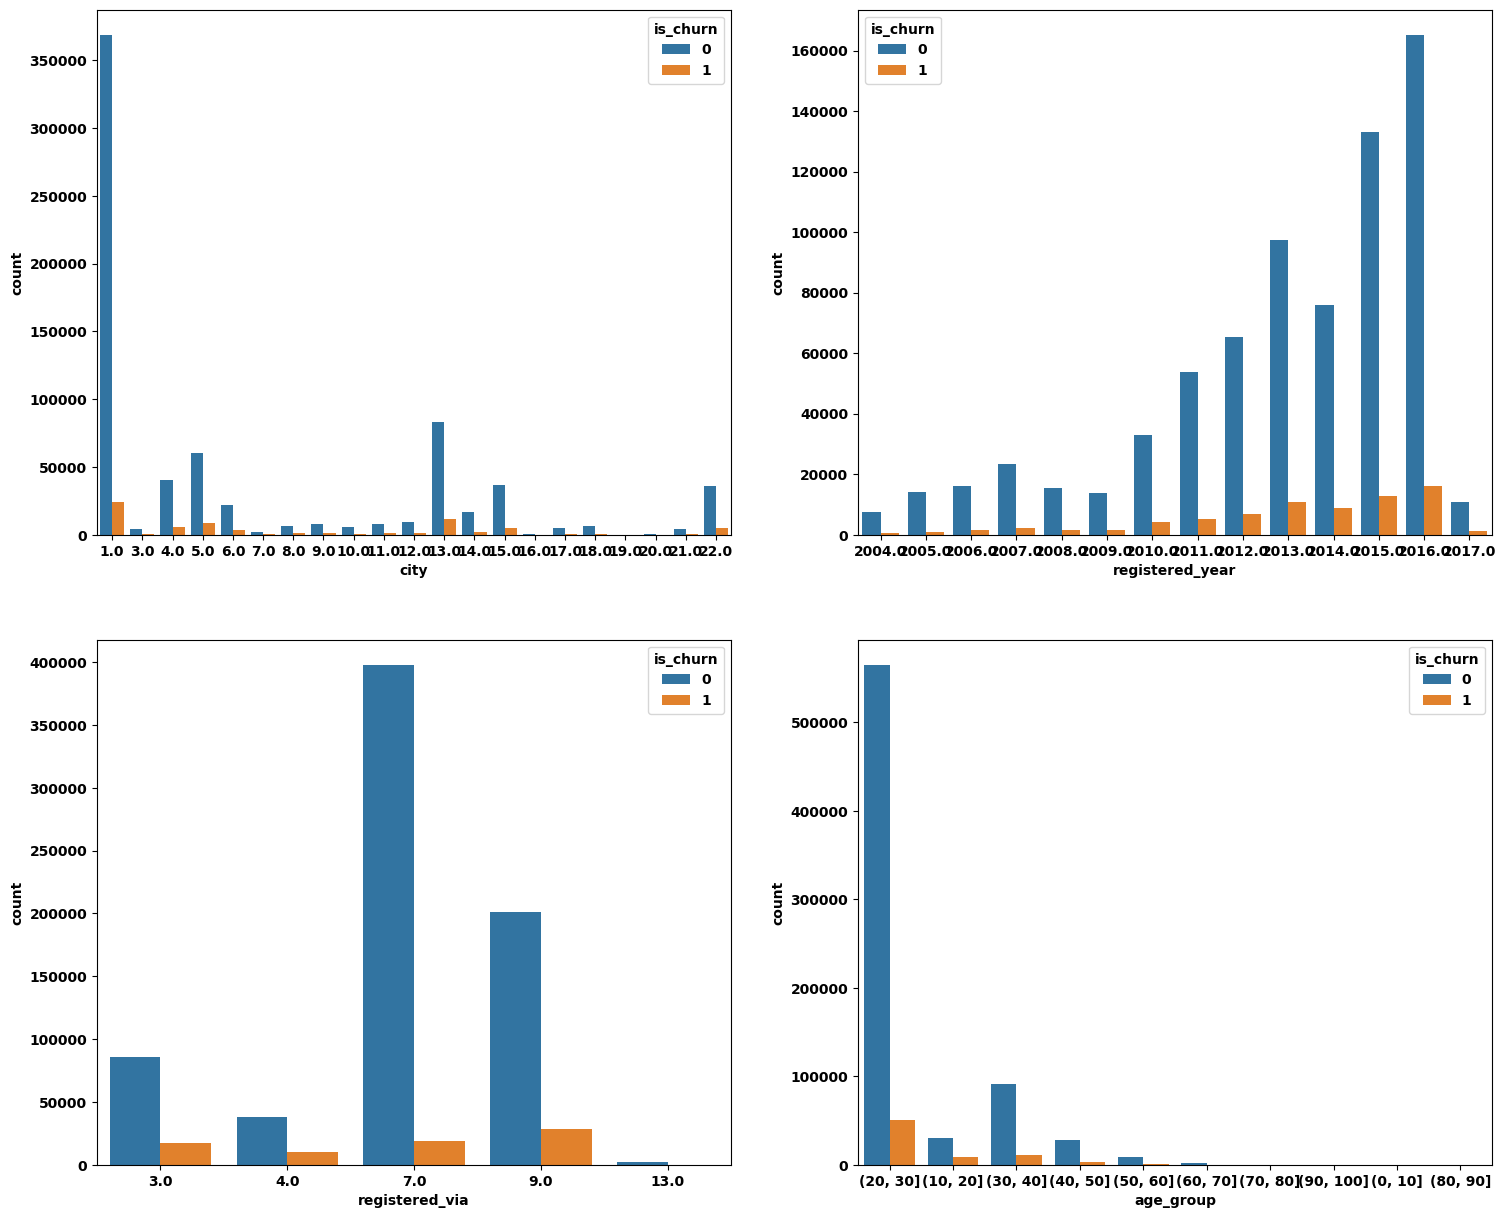

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(18,15))

#create countplot in each subplot
sns.countplot(x='city', data=data, hue='is_churn', ax=axes[0,0])
sns.countplot(x='registered_year', data=data, hue='is_churn', ax=axes[0,1])
sns.countplot(x='registered_via', data=data, hue='is_churn', ax=axes[1,0])
sns.countplot(x='age_group', data=data, hue='is_churn', ax=axes[1,1])



In [21]:
data['age_group'].value_counts()

(20, 30]     616044
(30, 40]     101905
(10, 20]      39166
(40, 50]      31151
(50, 60]       9966
(60, 70]       1715
(70, 80]        242
(0, 10]         111
(90, 100]       104
(80, 90]        101
Name: age_group, dtype: int64

In [22]:
data['city'].value_counts()

1.0     393226
13.0     95075
5.0      68885
4.0      45952
15.0     42060
22.0     40749
6.0      25292
14.0     19403
12.0     11054
9.0       9282
11.0      8860
18.0      7580
8.0       7335
10.0      6285
17.0      5300
21.0      5019
3.0       4887
7.0       2562
16.0       917
20.0       648
19.0       134
Name: city, dtype: int64

In [23]:
data['registered_via'].value_counts()

7.0     417102
9.0     229486
3.0     103040
4.0      48419
13.0      2458
Name: registered_via, dtype: int64

In [24]:
data['registered_year'].value_counts()

2016.0    181422
2015.0    145924
2013.0    108337
2014.0     84776
2012.0     72275
2011.0     58893
2010.0     37397
2007.0     25582
2006.0     17664
2008.0     17303
2009.0     15391
2005.0     15278
2017.0     12083
2004.0      8180
Name: registered_year, dtype: int64

Handling Categorical columns - 

1) city - It is numeric. We don't want to encode it.
2) age_group - It is object and can be ordinal encoded
3) registered_via -  It is numeric. We don't want to encode it.
4) registered_year -  It is numeric. We don't want to encode it.

In [25]:
data.loc[:,'age_group']


0         (20, 30]
1         (10, 20]
2         (10, 20]
3         (30, 40]
4         (20, 30]
            ...   
800500    (20, 30]
800501    (20, 30]
800502    (20, 30]
800503    (20, 30]
800504    (20, 30]
Name: age_group, Length: 800505, dtype: object

In [26]:
#Preprocessing step 1 : Ordinal encoding for age_group column
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
reshape = data[['age_group']].values.reshape(-1,1)
reshape
encode = ordinal.fit_transform(reshape)
data.loc[:,'age_group'] = np.squeeze(encode)
data.loc[:,'age_group']

C:\Users\elave\AppData\Local\Temp\ipykernel_9712\3429742446.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'age_group'] = np.squeeze(encode)


0         2.0
1         1.0
2         1.0
3         3.0
4         2.0
         ... 
800500    2.0
800501    2.0
800502    2.0
800503    2.0
800504    2.0
Name: age_group, Length: 800505, dtype: float64

In [27]:
#drop age column
data.drop(['bd'],axis=1,inplace=True)

In [28]:
#data is not consistent - better to drop this field
data.drop(['last_transaction_Exp_year'],axis=1,inplace=True)

In [30]:
data.drop(['registration_init_time'],axis=1,inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800505 entries, 0 to 800504
Data columns (total 83 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   msno                               800505 non-null  object 
 1   is_churn                           800505 non-null  int64  
 2   city                               800505 non-null  float64
 3   registered_via                     800505 non-null  float64
 4   registered_year                    800505 non-null  float64
 5   change_in_payment_method           800505 non-null  int64  
 6   total_transaction                  800505 non-null  int64  
 7   max_payment_method                 800505 non-null  int64  
 8   avg_plan_days                      800505 non-null  float64
 9   sum_plan_days                      800505 non-null  int64  
 10  change_in_plan_days                800505 non-null  int64  
 11  avg_list_price                     8005

In [33]:
data.to_csv('../data/processed/preprocessed.csv')

In [2]:
data = pd.read_csv('../data/processed/preprocessed.csv')

In [3]:
#Preprocessing step 2 : Standardization of numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#including only numeric column for scaling (exclude category and bool)
data_num = data.drop(['msno','is_churn','city','registered_via','registered_year','age_group','last_cancel_status','last_auto_renew','autorenew_not_cancel_flag','not_autorenew_cancel_flag','Days_Diff_trans_expire_date'],axis=1)
data_scale = scaler.fit_transform(data_num)

In [4]:
df_scale = pd.DataFrame(data_scale, columns = data_num.columns.tolist())

In [9]:

#category and bool columns
data_cat_bool = data[['msno','is_churn','city','registered_via','registered_year','age_group','last_cancel_status','last_auto_renew','autorenew_not_cancel_flag','not_autorenew_cancel_flag','Days_Diff_trans_expire_date']]

In [10]:
data_scaled =  pd.concat([data_cat_bool,df_scale],axis=1)

In [11]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800505 entries, 0 to 800504
Data columns (total 84 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   msno                               800505 non-null  object 
 1   is_churn                           800505 non-null  int64  
 2   city                               800505 non-null  float64
 3   registered_via                     800505 non-null  float64
 4   registered_year                    800505 non-null  float64
 5   age_group                          800505 non-null  float64
 6   last_cancel_status                 800505 non-null  int64  
 7   last_auto_renew                    800505 non-null  int64  
 8   autorenew_not_cancel_flag          800505 non-null  int64  
 9   not_autorenew_cancel_flag          800505 non-null  int64  
 10  Days_Diff_trans_expire_date        800505 non-null  int64  
 11  Unnamed: 0                         8005

In [12]:
data_scaled.to_csv('../data/processed/preprocessed_scaled.csv')

In [88]:
#Preprocessing step 3 : splitting into train and test set

from sklearn.model_selection import train_test_split

X = data_scaled.drop(['is_churn'],axis=1)
y= data_scaled[['is_churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


In [93]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((600378, 81), (600378, 1), (200127, 81), (200127, 1))

In [ ]:
# preprocessing removing outlier

#For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
#( < 3).all(axis=1) checks if, for each row, all column values are within 3 standard deviations from the mean
from scipy import stats

data_outlier  = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data_outlier.shape